In [2]:

import sys
import os
sys.path.append('../')
from Codes.model import *
from Codes.utils import *


plt.style.use('default')

import pickle
RESULT_DIR = "../../ExptsEval"
# os.mkdir(RESULT_DIR)
from timeit import default_timer
from sklearn.datasets import make_blobs

from tqdm.notebook import tqdm
from matplotlib import rc


## Plot for Norm-Out dataset

In [51]:

# ratio_list = [10, 20, 30, 40, 50 ]
ratio_list = [1, 10, 20, 30, 40, 50 ]


col = [
    'tab:green',
    'tab:blue',
# 'tab:orange',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan']


markers = ["D", "^", "<", "D",  "v", "s"]

In [6]:

def extractData(K,D,ratio_list ):

   
    df_maxdist = pd.DataFrame(ratio_list, columns=['Dense/Sparse ratio'])
    df_time = pd.DataFrame(ratio_list, columns=['Dense/Sparse ratio'])
     
    # cols = ['lls-kp',r'$\varepsilon$'+'-greedy',r'$\varepsilon$'+'-rg']
    cols = ['dir-ls-iter','dir-et-iter','dir-et-milp-rg']


    datasets = ['kp','greedy','clsvr']

    for i, model in enumerate(datasets):
        if model == 'clsvr':

            with open(os.path.join(RESULT_DIR, 'SynImb2_'+str(K)+str(D)+'_' + str(model)+'.pkl'), 'rb') as inp:
                metrics_list = pickle.load(inp)
                time_list = pickle.load(inp)
                constrsCnt_list = pickle.load(inp)
                optgap_list = pickle.load(inp)
                maxdist_list = pickle.load(inp)
                weights_list = pickle.load(inp)
                bias_list = pickle.load(inp)
                


            df_maxdist[cols[i]] = np.array(maxdist_list)
            df_time[cols[i]] = np.array(time_list)


        else :

            with open(os.path.join(RESULT_DIR, 'SynImb2_'+str(K)+str(D)+'_' + str(model) + '.pkl'), 'rb') as inp:
                metrics_list = pickle.load(inp)
                time_list = pickle.load(inp)
                maxdist_list = pickle.load(inp)
                weights_list = pickle.load(inp)
                bias_list = pickle.load(inp)

            df_maxdist[cols[i]] = np.array(maxdist_list)
            df_time[cols[i]] = np.array(time_list)


    return df_maxdist, df_time


In [7]:
K = 3
D = 1
df_maxdist, df_time = extractData(K,D,ratio_list )


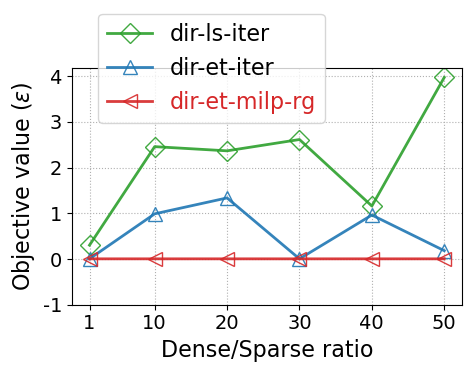

In [55]:


plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(1, 1, figsize = (5,4), sharey = True, sharex=True)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax.xaxis.set_major_formatter(FormatStrFormatter('%i'))

K = 3
D = 1
    
df_maxdist, df_time = extractData(K,D,ratio_list )

# cols = ['k,z-center', 'k,l-MinMax' ]
# cols = ['lls-kp',r'$\varepsilon$'+'-greedy',r'$\varepsilon$'+'-rg']
cols = ['dir-ls-iter','dir-et-iter','dir-et-milp-rg']




for j, model in enumerate(cols):

    df_maxdist.plot(x = 'Dense/Sparse ratio', y = model, marker = markers[j], fillstyle = 'none', color=col[j], ax = ax, markersize = 10, alpha = 0.9, linewidth = 2,legend = False)

ax.set_ylabel('Objective value ('+r'$\varepsilon$'+')')
ax.grid(True, linestyle = ':')
# ax[i].set_title('\n\nNorm-Out (k: '+str(K)+')')
# ax.set_title('(k: '+str(K)+')')
ax.set_title('\n')
ax.set_yticks([-1, 0,1,2,3,4])
ax.set_xticks([1,10,20,30,40,50])

ax.tick_params(axis='both', which='major', labelsize=14)   

# ax.set_xscale('log')


fig.tight_layout()
# handles, labels = ax.get_legend_handles_labels()
leg = plt.legend(bbox_to_anchor=(0.04, 1.0), loc="center left")
# leg = plt.legend(loc='upper center')
for i, text in enumerate(leg.get_texts()):
    if i==2:
        text.set_color("C03")
    # else:
    #     text.set_color("red")

# plt.legend(facecolor='k', labelcolor='w')
# fig.legend(handles, labels , loc='upper center', mode = 'False', ncol=len(df_maxdist.columns)//2,fontsize = 16, markerscale = 1)

plt.savefig(f'{RESULT_DIR}/SynImb_obj.pdf', bbox_inches = 'tight')
# plt.rcParams.update({'font.size': 22})
plt.show()